In [ ]:
ROOT = "/content/drive/MyDrive/001_SUNNY_BHAVEEN_CHANDRA/001_My_Classes/DLCVNLP/Live Lectures Material DLCVNLP April 17th batch/Day 06 May 16/Day 05 updated code"

In [ ]:
import os
os.chdir(ROOT)

In [ ]:
os.getcwd()

'/content/drive/MyDrive/001_SUNNY_BHAVEEN_CHANDRA/001_My_Classes/DLCVNLP/Live Lectures Material DLCVNLP April 17th batch/Day 06 May 16/Day 05 updated code'

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import joblib
import pandas as pd

# plt.style.use("fivethirtyeight")

In [ ]:
class Perceptron:
  def __init__(self, eta, epochs):
    self.weights = np.random.randn(3) * 1e-4
    print(f"self.weights: {self.weights}")
    self.eta = eta
    self.epochs = epochs

  def activationFunction(self, inputs, weights):
    z = np.dot(inputs, weights)
    return np.where(z > 0 , 1, 0)

  def fit(self, X, y):
    self.X = X
    self.y = y

    X_with_bias = np.c_[self.X, -np.ones((len(self.X), 1))] # concactination
    print(f"X_with_bias: \n{X_with_bias}")

    for epoch in range(self.epochs):
      print(f"for epoch: {epoch}")
      y_hat = self.activationFunction(X_with_bias, self.weights)
      print(f"predicted value: \n{y_hat}")
      error = self.y - y_hat
      print(f"error: \n{error}")
      self.weights = self.weights + self.eta * np.dot(X_with_bias.T, error)
      print(f"updated weights: \n{self.weights}")
      print("#############\n")

  def predict(self, X):
    # X_with_bias = np.c_[X, -np.ones((len(self.X), 1))]
    X_with_bias = np.c_[X, -np.ones((len(X), 1))]
    return self.activationFunction(X_with_bias, self.weights)


In [ ]:
# discarded
# activationFunction = lambda inputs, weights: np.where(np.dot(inputs, weights) > 0 , 1, 0)

```python
def activationFunction(inputs, weights):
  z = np.dot(inputs, weights)
  y_hat = np.where(z > 0, 1, 0)
  return y_hat

def activationFunction(inputs, weights):
  z = np.dot(inputs, weights)
  if z > 0:
    y_hat = 1
  else:
    y_hat = 0
  return y_hat


```

# AND

In [ ]:
data = {"x1": [0,0,1,1], "x2": [0,1,0,1], "y": [0,0,0,1]}

AND = pd.DataFrame(data)
AND

,x1,x2,y
0,0,0,0
1,0,1,0
2,1,0,0
3,1,1,1


In [ ]:
X = AND.drop("y", axis=1) # axis = 1 >>> dropping accross column
X

,x1,x2
0,0,0
1,0,1
2,1,0
3,1,1


In [ ]:
y = AND['y']
y.to_frame()

,y
0,0
1,0
2,0
3,1


In [ ]:
# model = Perceptron(eta = 0.5, epochs=10, activationFunction=activationFunction)
model = Perceptron(eta = 0.5, epochs=10)

self.weights: [ 6.02675123e-05  2.59184192e-05 -2.49459566e-05]


In [ ]:
model.fit(X,y)

X_with_bias: 
[[ 0.  0. -1.]
 [ 0.  1. -1.]
 [ 1.  0. -1.]
 [ 1.  1. -1.]]
for epoch: 0
predicted value: 
[1 1 1 1]
error: 
0   -1
1   -1
2   -1
3    0
Name: y, dtype: int64
updated weights: 
[-0.49993973 -0.49997408  1.49997505]
#############

for epoch: 1
predicted value: 
[0 0 0 0]
error: 
0    0
1    0
2    0
3    1
Name: y, dtype: int64
updated weights: 
[6.02675123e-05 2.59184192e-05 9.99975054e-01]
#############

for epoch: 2
predicted value: 
[0 0 0 0]
error: 
0    0
1    0
2    0
3    1
Name: y, dtype: int64
updated weights: 
[0.50006027 0.50002592 0.49997505]
#############

for epoch: 3
predicted value: 
[0 1 1 1]
error: 
0    0
1   -1
2   -1
3    0
Name: y, dtype: int64
updated weights: 
[6.02675123e-05 2.59184192e-05 1.49997505e+00]
#############

for epoch: 4
predicted value: 
[0 0 0 0]
error: 
0    0
1    0
2    0
3    1
Name: y, dtype: int64
updated weights: 
[0.50006027 0.50002592 0.99997505]
#############

for epoch: 5
predicted value: 
[0 0 0 1]
error: 
0    0
1    0


In [ ]:
X.values, X.shape

In [ ]:
model.predict(X)

array([0, 0, 0, 1])

In [ ]:
new_data = np.array([[1,1]])
model.predict(new_data)

In [ ]:
model.weights

array([0.50006027, 0.50002592, 0.99997505])

## save and load model

In [ ]:
import os

# saving model
dir_ = "model"
os.makedirs(dir_, exist_ok=True)
filename = os.path.join(dir_, 'AND_model.model')
joblib.dump(model, filename)

# some time later...

# load the model from disk
loaded_model = joblib.load(filename)
result = loaded_model.predict(X)
print(result)

[0 0 0 1]


# OR

In [ ]:
data = {"x1": [0,0,1,1], "x2": [0,1,0,1], "y": [0,1,1,1]}

OR = pd.DataFrame(data)
OR

,x1,x2,y
0,0,0,0
1,0,1,1
2,1,0,1
3,1,1,1


In [ ]:
X = OR.drop("y", axis=1) # axis = 1 >>> dropping accross column
X

,x1,x2
0,0,0
1,0,1
2,1,0
3,1,1


In [ ]:
y = OR['y']
y.to_frame()

,y
0,0
1,1
2,1
3,1


In [ ]:
model = Perceptron(eta = 0.5, epochs=10)

self.weights: [ 0.00013201  0.00011855 -0.00014136]


In [ ]:
model.fit(X,y)

X_with_bias: 
[[ 0.  0. -1.]
 [ 0.  1. -1.]
 [ 1.  0. -1.]
 [ 1.  1. -1.]]
for epoch: 0
predicted value: 
[1 1 1 1]
error: 
0   -1
1    0
2    0
3    0
Name: y, dtype: int64
updated weights: 
[1.32013683e-04 1.18549362e-04 4.99858638e-01]
#############

for epoch: 1
predicted value: 
[0 0 0 0]
error: 
0    0
1    1
2    1
3    1
Name: y, dtype: int64
updated weights: 
[ 1.00013201  1.00011855 -1.00014136]
#############

for epoch: 2
predicted value: 
[1 1 1 1]
error: 
0   -1
1    0
2    0
3    0
Name: y, dtype: int64
updated weights: 
[ 1.00013201  1.00011855 -0.50014136]
#############

for epoch: 3
predicted value: 
[1 1 1 1]
error: 
0   -1
1    0
2    0
3    0
Name: y, dtype: int64
updated weights: 
[ 1.00013201e+00  1.00011855e+00 -1.41361954e-04]
#############

for epoch: 4
predicted value: 
[1 1 1 1]
error: 
0   -1
1    0
2    0
3    0
Name: y, dtype: int64
updated weights: 
[1.00013201 1.00011855 0.49985864]
#############

for epoch: 5
predicted value: 
[0 1 1 1]
error: 
0    0
1

# XOR

In [ ]:
data = {"x1": [0,0,1,1], "x2": [0,1,0,1], "y": [0,1,1,0]}

XOR = pd.DataFrame(data)
XOR

,x1,x2,y
0,0,0,0
1,0,1,1
2,1,0,1
3,1,1,0


In [ ]:
X = XOR.drop("y", axis=1) # axis = 1 >>> dropping accross column
X

,x1,x2
0,0,0
1,0,1
2,1,0
3,1,1


In [ ]:
y = XOR['y']
y.to_frame()

,y
0,0
1,1
2,1
3,0


In [ ]:
model = Perceptron(eta = 0.5, epochs=50)


self.weights: [-5.41306595e-05  1.42114142e-04 -8.17493585e-05]


In [ ]:
model.fit(X,y)

X_with_bias: 
[[ 0.  0. -1.]
 [ 0.  1. -1.]
 [ 1.  0. -1.]
 [ 1.  1. -1.]]
for epoch: 0
predicted value: 
[1 1 1 1]
error: 
0   -1
1    0
2    0
3   -1
Name: y, dtype: int64
updated weights: 
[-0.50005413 -0.49985789  0.99991825]
#############

for epoch: 1
predicted value: 
[0 0 0 0]
error: 
0    0
1    1
2    1
3    0
Name: y, dtype: int64
updated weights: 
[-5.41306595e-05  1.42114142e-04 -8.17493585e-05]
#############

for epoch: 2
predicted value: 
[1 1 1 1]
error: 
0   -1
1    0
2    0
3   -1
Name: y, dtype: int64
updated weights: 
[-0.50005413 -0.49985789  0.99991825]
#############

for epoch: 3
predicted value: 
[0 0 0 0]
error: 
0    0
1    1
2    1
3    0
Name: y, dtype: int64
updated weights: 
[-5.41306595e-05  1.42114142e-04 -8.17493585e-05]
#############

for epoch: 4
predicted value: 
[1 1 1 1]
error: 
0   -1
1    0
2    0
3   -1
Name: y, dtype: int64
updated weights: 
[-0.50005413 -0.49985789  0.99991825]
#############

for epoch: 5
predicted value: 
[0 0 0 0]
error: 
0 

In [ ]:
model.predict(X)

array([1, 1, 1, 1])

# Analysis with the graph

### AND GATE

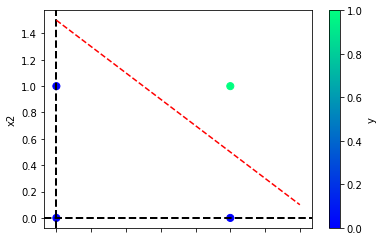

In [ ]:
AND.plot(kind="scatter", x="x1", y="x2", c="y", s=50, cmap="winter")
plt.axhline(y=0, color="black", linestyle="--", linewidth=2)
plt.axvline(x=0, color="black", linestyle="--", linewidth=2)

x = np.linspace(0, 1.4) # >>> 50 
y = 1.5 - 1*np.linspace(0, 1.4) # >>> 50 

plt.plot(x, y, "r--")

### OR

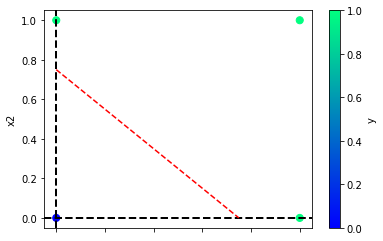

In [ ]:
OR.plot(kind="scatter", x="x1", y="x2", c="y", s=50, cmap="winter")
plt.axhline(y = 0, color ="black", linestyle ="--", linewidth=2)
plt.axvline(x = 0, color ="black", linestyle ="--", linewidth=2)
plt.plot(np.linspace(0,0.75), 0.75 - 1*np.linspace(0,0.75), 'r--');

# XOR

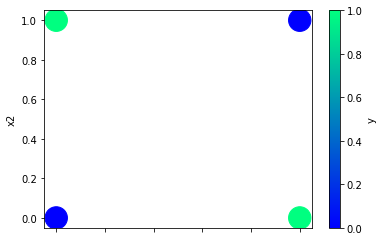

In [ ]:
XOR.plot(kind="scatter", x="x1", y="x2", c="y", s=500, cmap="winter")
